In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value

In [2]:
df= pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [3]:
df.describe(include='all')

,x1,x2,x3,x4,x5,x6
count,5.000000,5.000000,6.000000,5,5,4
unique,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,A,X,M
freq,NaN,NaN,NaN,2,3,3
mean,6.200000,4.800000,10.166667,NaN,NaN,NaN
std,1.923538,1.095445,1.471960,NaN,NaN,NaN
min,4.000000,3.000000,8.000000,NaN,NaN,NaN
25%,5.000000,5.000000,9.250000,NaN,NaN,NaN
50%,6.000000,5.000000,10.500000,NaN,NaN,NaN
75%,7.000000,5.000000,11.000000,NaN,NaN,NaN


## Simple Imputer

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
# impute mean ke x1, x2, x3
imputer= SimpleImputer(strategy='mean') #bisa diganti median
df[['x1','x2','x3']]= imputer.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


In [6]:
# impute ke x4 dan x5 dengan modus
imputer_modus=SimpleImputer(strategy='most_frequent')
df[['x4','x5']]=imputer_modus.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


In [7]:
# isi x6 dengan kategori baru 'P'
imputer_cons=SimpleImputer(strategy='constant', fill_value='P')
df[['x6']]= imputer_cons.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


## Iterative Imputer 
data numerik saja

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
df= pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan]
})
df

,x1,x2,x3,x4
0,4.0,3.0,10,A
1,5.0,5.0,11,A
2,NaN,6.0,12,C
3,6.0,5.0,9,C
4,7.0,NaN,8,D
5,9.0,5.0,11,NaN


In [10]:
imp_int= IterativeImputer(max_iter=10, random_state=0)
df[['x1','x2','x3']]= imp_int.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.000000,3.000000,10.0,A
1,5.000000,5.000000,11.0,A
2,6.202755,6.000000,12.0,C
3,6.000000,5.000000,9.0,C
4,7.000000,4.705522,8.0,D
5,9.000000,5.000000,11.0,NaN


## KNN Imputer
data numerik saja

In [11]:
from sklearn.impute import KNNImputer

In [12]:
df= pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan]
})
df

,x1,x2,x3,x4
0,4.0,3.0,10,A
1,5.0,5.0,11,A
2,NaN,6.0,12,C
3,6.0,5.0,9,C
4,7.0,NaN,8,D
5,9.0,5.0,11,NaN


In [13]:
knn_imp= KNNImputer(n_neighbors=2)
df[['x1','x2','x3']]=knn_imp.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.0,3.0,10.0,A
1,5.0,5.0,11.0,A
2,7.0,6.0,12.0,C
3,6.0,5.0,9.0,C
4,7.0,5.0,8.0,D
5,9.0,5.0,11.0,NaN


## Imputers in model

In [14]:
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import RobustScaler, OneHotEncoder
    import category_encoders as ce

In [15]:
df= pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [16]:
df.isna().sum()

sex              0
age            177
parch            0
fare             0
class            0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

deck di drop karena terlalu banyak missing value

One Hot --> sex, embark town, alone  
Ordinal --> class  
simple imputer (median) --> age  
robust scaler --> age, fare  

### Transformer

In [17]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [18]:
# untuk age, fare (fare tidak ada missing data)
imputer= SimpleImputer(strategy='mean')
pipe_scale=Pipeline([
    ('impute', imputer),
    ('scaling', RobustScaler())
]) #pipeline: melakukan beberapa tahap sekuensial sekaligus. dalam contoh ini, melakukan impute data kosong diikuti scaling

#mapping ordinal untuk class
mapping= [{'col':'class', 'mapping':{None: 0,'First':1,'Second':2, 'Third':3}}]
ordinal= ce.OrdinalEncoder(mapping=mapping)

# untuk kolom embark town (ada missing value)
imputer_mode= SimpleImputer(strategy='most_frequent')
pipe_one_hot= Pipeline([('impute_mode', imputer_mode), ('one hot', OneHotEncoder())])

In [19]:
transformer= ColumnTransformer([
    ('One Hot', pipe_one_hot, ['sex','embark_town','alone']),
    ('Ordinal', ordinal,['class']),
    ('impute scaling', pipe_scale, ['age', 'fare'])
], remainder='passthrough')

In [20]:
pd. DataFrame(transformer.fit_transform(df.drop(columns=['deck','alive'])))

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,-0.592240,-0.312011,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.638529,2.461242,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,-0.284548,-0.282777,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.407760,1.673732,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.407760,-0.277363,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,-0.207624,-0.062981,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.823009,0.673281,0.0
888,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.000000,0.389604,2.0
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.284548,0.673281,0.0


In [21]:
transformer.transformers_[0][1][1].get_feature_names()

array(['x0_female', 'x0_male', 'x1_Cherbourg', 'x1_Queenstown',
       'x1_Southampton', 'x2_False', 'x2_True'], dtype=object)

In [22]:
transformer.transformers_[1][1].get_feature_names()


['class']

In [23]:
features=list(transformer.transformers_[0][1][1].get_feature_names())+transformer.transformers_[1][1].get_feature_names()+['age', 'fare','parch']

In [24]:
pd.DataFrame(transformer.fit_transform(df.drop(columns=['deck','alive'])), columns=features)

,x0_female,x0_male,x1_Cherbourg,x1_Queenstown,x1_Southampton,x2_False,x2_True,class,age,fare,parch
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,-0.592240,-0.312011,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.638529,2.461242,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,-0.284548,-0.282777,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.407760,1.673732,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.407760,-0.277363,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,-0.207624,-0.062981,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.823009,0.673281,0.0
888,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.000000,0.389604,2.0
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.284548,0.673281,0.0


# Outliers

In [25]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-25-c9a109010036>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [26]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})
df_assotiation

,x,y,y_real
0,162.10,61.41,58.73
1,159.72,58.31,57.90
2,164.50,60.66,59.58
3,155.63,61.31,56.47
4,156.36,56.22,56.73
...,...,...,...
95,157.77,57.66,57.22
96,161.87,58.71,58.65
97,162.77,58.37,58.97
98,164.83,57.85,59.69


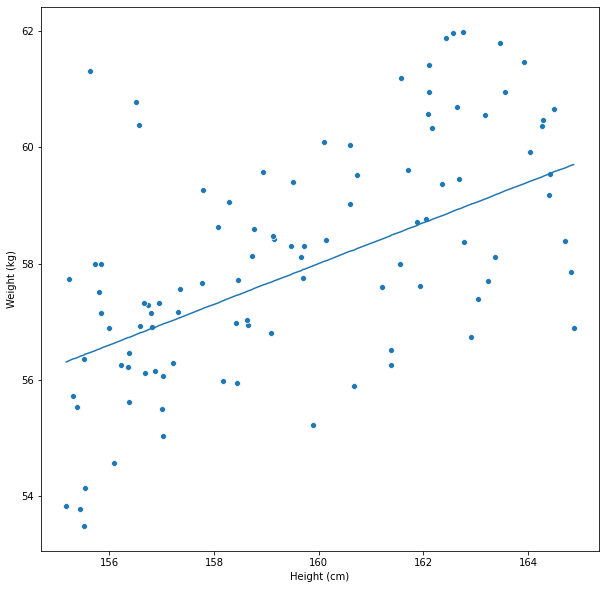

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y', data=df_assotiation)
sns.lineplot(x='x',y='y_real', data=df_assotiation)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Scatter Plot of two variable without outlier

## Global outliers

In [28]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_outlier = df_assotiation.append(df_add)

<ipython-input-28-9c10daf93ae1>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


Text(0, 0.5, 'Weight (Kg)')

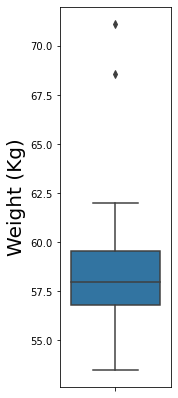

In [29]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0.5, 0, 'Height (cm)')

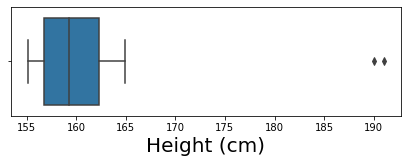

In [30]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df_assotiation_outlier['x'])
plt.xlabel('Height (cm)', fontsize = 20)

Global outlier biasanya dideteksi dengan boxplot. 

## Contextual Outliers

In [31]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-31-11188d5fdd32>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [32]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})

In [33]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_contextual = df_assotiation.append(df_add)

Text(0, 0.5, 'Weight (Kg)')

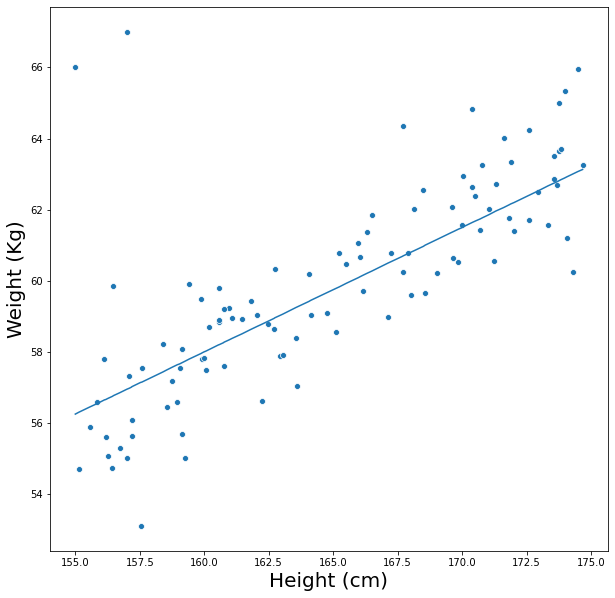

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',data = df_assotiation_contextual)
sns.lineplot(x='x',y='y_real',data = df_assotiation_contextual)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

berat bedan 66-67 kg dengan tinggi badan 155-157 adalah kontekstual outlier.

## Influential Observation
outlier yang mempengaruhi linear model (broke the pattern)

In [35]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_influenced = df_assotiation.append(df_add)

Text(0, 0.5, 'Weight (Kg)')

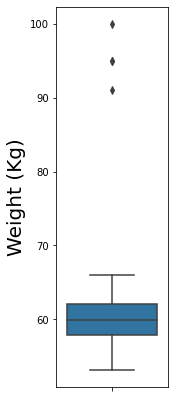

In [36]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_influenced['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0, 0.5, 'Weight (Kg)')

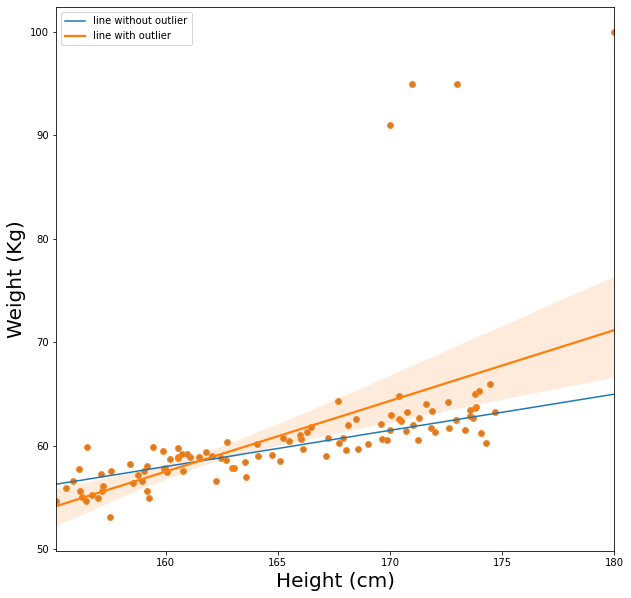

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',data = df_assotiation_influenced)
sns.lineplot(x='x',y='y_real',data = df_assotiation_influenced)
sns.regplot(x='x',y='y',data = df_assotiation_influenced)
plt.legend(['line without outlier','line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0.5, 1.0, 'residual plot if outlier included')

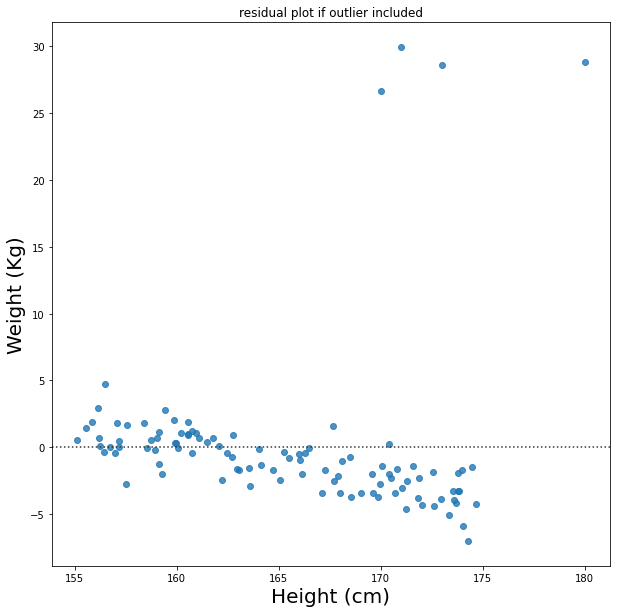

In [38]:
plt.figure(figsize=(10,10))
sns.residplot(x='x',y='y',data = df_assotiation_influenced)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier included')

Text(0.5, 1.0, 'residual plot if outlier excluded')

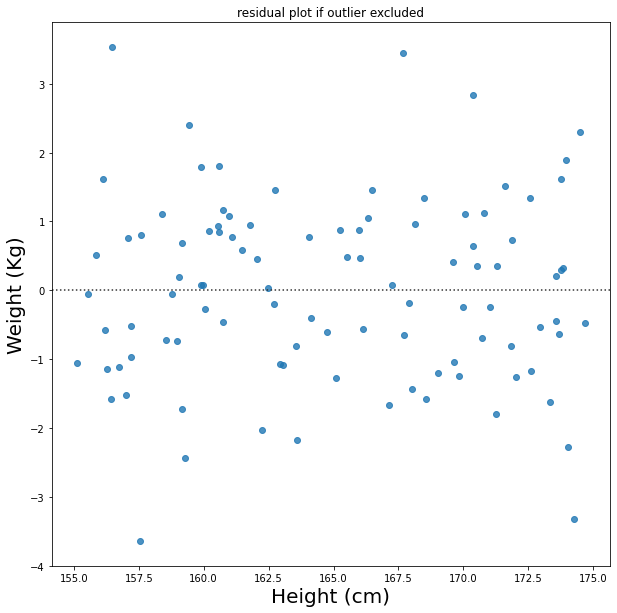

In [39]:
plt.figure(figsize=(10,10))
sns.residplot(x='x',y='y',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier excluded')

## Handling Outliers
* sama seperti handling missing value:
    * di drop
    * biarkan
    * ganti dengan angka lain
    * tandai

In [57]:
df=pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


# Tugas

Masih dengan data titanic:  
    * features= sex, age, parch, fare, class, embark_town, alone  
    * target= alive  
      
skema:   
    * isi missing value embark town dengan modus  
    * one hot: sex, embark town, alone
    * ordinal: class
    
model: decision tree classifier, max depth= 3  
splitting data: 80-20, random state 2020  

bandingkan performa model ketika impute data age dilakukan dengan:
    * simple imputer (median)
    * iterative imputer
    * knn imputer

In [41]:
mapping= [{'col':'class', 'mapping':{None: 0,'First':1,'Second':2, 'Third':3}}]
ordinal= ce.OrdinalEncoder(mapping=mapping)


imputer_mode= SimpleImputer(strategy='most_frequent')
pipe_one_hot= Pipeline([('impute_mode', imputer_mode), ('one hot', OneHotEncoder())])

In [42]:
transformer1= ColumnTransformer([
    ('One Hot', pipe_one_hot, ['sex','embark_town','alone']),
    ('Ordinal', ordinal,['class']),
    ('impute', SimpleImputer(strategy='median'), ['age'])
], remainder='passthrough') 

In [43]:
transformer2= ColumnTransformer([
    ('One Hot', pipe_one_hot, ['sex','embark_town','alone']),
    ('Ordinal', ordinal,['class']),
    ('impute', IterativeImputer(), ['age'])
], remainder='passthrough') 

In [44]:
transformer3= ColumnTransformer([
    ('One Hot', pipe_one_hot, ['sex','embark_town','alone']),
    ('Ordinal', ordinal,['class']),
    ('impute', KNNImputer(), ['age'])
], remainder='passthrough') 

In [45]:
trans=[transformer1, transformer2,transformer3]

In [46]:
x= df[['sex', 'age', 'parch', 'fare', 'class', 'embark_town', 'alone']]
y=[1 if i== 'yes' else 0 for i in df['alive']]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [48]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, random_state=2020, test_size=.2)

In [49]:
score=[]
data_x=[]

for i in trans:
    x_train_preprocessed= pd.DataFrame(i.fit_transform(x_train))
    x_test_preprocessed= pd.DataFrame(i.fit_transform(x_test))
    features=list(i.transformers_[0][1][1].get_feature_names())+i.transformers_[1][1].get_feature_names()+['age', 'fare','parch']

    x_train_preprocessed.columns=features
    x_test_preprocessed.columns=features
    
    data_x.append(x_train_preprocessed)
    model=DecisionTreeClassifier(max_depth=3)
    model.fit(x_train_preprocessed,y_train)

    score.append(accuracy_score (y_test,model.predict(x_test_preprocessed)))

In [50]:
pd.DataFrame({'score':score}, index=['median','iterative','knn'])

,score
median,0.776536
iterative,0.776536
knn,0.776536


In [51]:
pd.DataFrame({'importance':model.feature_importances_}, index=features)

,importance
x0_female,0.000000
x0_male,0.628704
x1_Cherbourg,0.000000
x1_Queenstown,0.000000
x1_Southampton,0.000000
x2_False,0.000000
x2_True,0.000000
class,0.172485
age,0.064861
fare,0.000000


In [68]:
data_x[0]['age']

0      54.0
1      22.0
2      29.0
3      28.0
4      40.0
       ... 
707    36.0
708    28.0
709    38.0
710    51.0
711    28.0
Name: age, Length: 712, dtype: float64

In [71]:
data_x[1]['age']

0      54.000000
1      22.000000
2      29.000000
3      29.665501
4      40.000000
         ...    
707    36.000000
708    29.665501
709    38.000000
710    51.000000
711    29.665501
Name: age, Length: 712, dtype: float64

In [72]:
data_x[2]['age']

0      54.000000
1      22.000000
2      29.000000
3      29.665501
4      40.000000
         ...    
707    36.000000
708    29.665501
709    38.000000
710    51.000000
711    29.665501
Name: age, Length: 712, dtype: float64